# Introduction

In [1]:
# import necessary libraries and adjust jupyter to show interactive plots
# requires matplotlib, ipympl, and numpy
# requires python3 for UTF8 character support

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

import numpy as np

In [2]:
# define the most basic linear algebra equation y = ax + b

def linear_eq(a, x, b):
    return a * x + b

In [3]:
# x is the independent variable, let us generate 50 samples

x = np.linspace(-3, 3, 50)
a = 1
b = 0

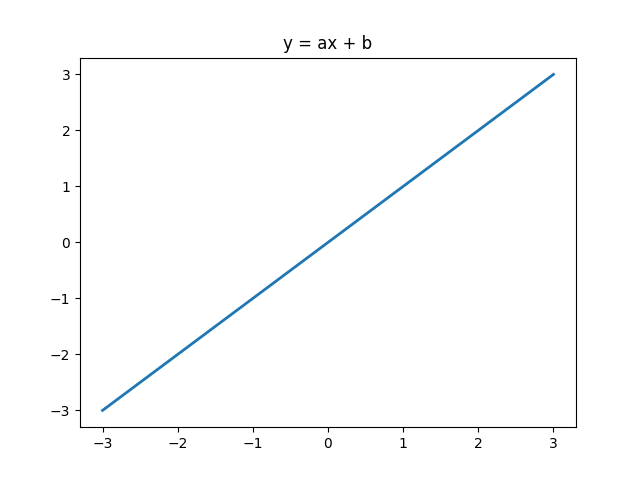

In [4]:
# visualize the function

fig, ax = plt.subplots()
line, = plt.plot(x, linear_eq(a, x, b), lw=2)
plt.title("y = ax + b")
plt.show()

In [1]:
# make room for sliders

plt.subplots_adjust(left=0.25)

# create sliders and set their sizes

a_ax = plt.axes([0.08, 0.1, 0.02, 0.8])
a_slider = Slider(ax=a_ax, label="a", valmin=-3, valmax=3, valinit=1, orientation="vertical")
b_ax = plt.axes([0.15, 0.1, 0.02, 0.8])
b_slider = Slider(ax=b_ax, label="b", valmin=-3, valmax=3, valinit=0, orientation="vertical")

# create function to update plot when sliders are moved

def update_plot(val):
    line.set_ydata(linear_eq(a_slider.val, x, b_slider.val))
    fig.canvas.draw_idle()

# register function with sliders

a_slider.on_changed(update_plot)
b_slider.on_changed(update_plot)

NameError: name 'plt' is not defined

# Generate Data

In [6]:
# here are our secret parameters

secret_a = 1.7
secret_b = 0.8

# generate 50 samples, perturb them just a little bit, and put them on a line

x = np.linspace(-3, 3, 50)
y = linear_eq(secret_a, x, secret_b) + np.random.randn(50)

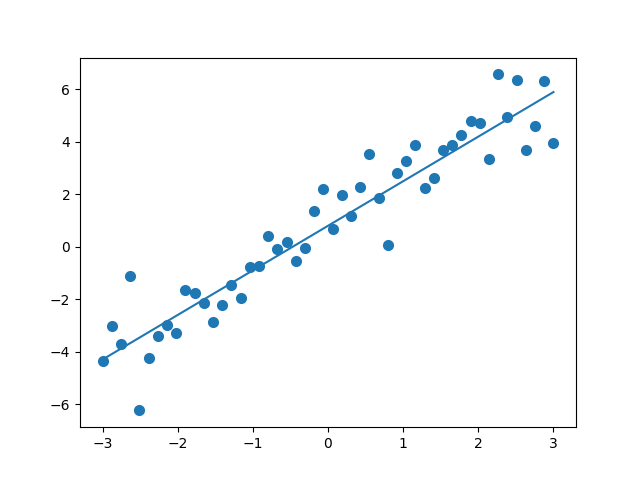

In [9]:
# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.scatter(x, y, lw=2)
plt.plot(x, linear_eq(secret_a, x, secret_b))

# Quantifying the error using OLS
Gauss used the (ordinary) least squares method to calculate errors long before "statisticians" ever existed, and this is how we also will implement our first linear regression. However, given that not all our scientific colleagues understand that code is mathematics, we are sometimes compelled to include ancient calculus notation to help them understand things. It might also be the case that someone does not trust the computer's calculations and wishes to perform their own functional analysis using pen and paper. In either case, one can make use of LaTeX notation straight in Jupyter.

To enter LaTeX characters in Jupyter just type \ and then the character you want and then Tab. You can use UTF8 characters as variable names in Python3. If you're not familiar with LaTex, use the online editor at [Lagrida](http://https://latexeditor.lagrida.com/)

Here is the model (sometimes called the slope):

$ a = \tfrac{\sum_{n}^{i=1}(x_i-\bar x)(y_i-\bar y)}{\sum_{n}^{i=1}(x_i-\bar x)^2} $

Here is the bias (sometimes called intercept):

$ b = \bar y-a\bar x $

Here is the arithmetic mean square error function which we will use to calculate the loss:

$ mse(x)=\tfrac{\sum_{n}^{i=1}(y_i-p_i)^2}{n} $

Where $\bar x$ and $\bar y$ are the mean of X and Y, and p is the value of the linear function.

In any case, most of the time code is a much more succinct way to present algorithms, so let's get to it!

In [10]:
# generate the model using OLS
# this is also known as "fitting" the model
# or "training" the model

x̄ = x.mean()
ȳ = y.mean()

a = sum((x - x̄)*(y - ȳ))/sum((x - x̄)**2)

In [11]:
# calculate bias

b = ȳ - a * x̄

In [12]:
# define a mean squared error loss function

def mse(ŷ, y):
    return sum((y - ŷ)**2) / y.size

loss = mse

In [13]:
# use the model to generate predictions

ŷ = linear_eq(a, x, b)

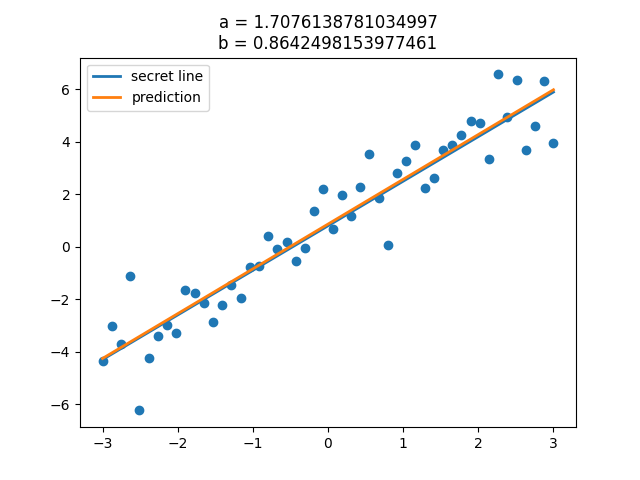

In [20]:
# visualize the points and model

plt.close('all')

plt.scatter(x, y)
plt.plot(x, linear_eq(secret_a, x, secret_b), lw=2, label='secret line')
plt.plot(x, ŷ, lw=2, label='prediction')


plt.legend()
plt.title('a = {a}\nb = {b}'.format(a=a, b=b))
plt.show()

In [21]:
# let us calculate the loss by comparing 

loss(ŷ, y)

1.032765952333645

# Using a Machine Learning library - SciKit Learn
That wasn't so hard! Let's try solving the same problem, but this time we will use a popular Python library that does these calculations in an obtuse object-oriented way.

In [22]:
# import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
# create linear regression model

m = LinearRegression()

In [24]:
# the regressor function expects 2D arrays so let's reshape them

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [25]:
# let us train the model

m.fit(x, y)

LinearRegression()

In [26]:
# we generate the line which the model describes
# remember Python uses 0 indexing to make pointer arithmetic easier /s

a = m.coef_[0][0]
b = m.intercept_[0]

line = linear_eq(a, x, b)

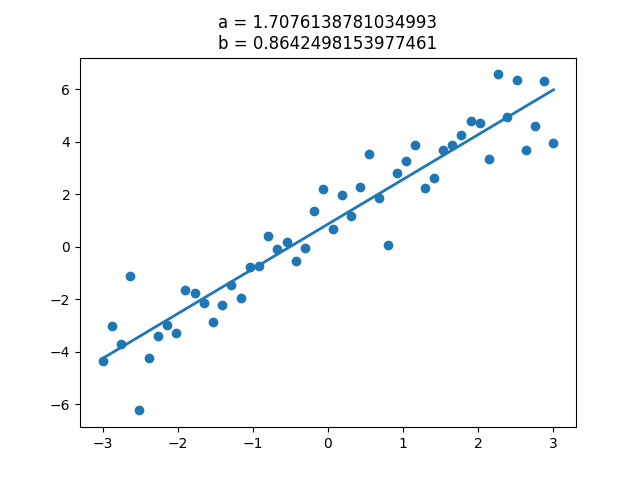

In [27]:
# visualize the points and model

plt.close('all')

plt.scatter(x, y)
plt.plot(x, line, lw=2)

plt.title('a = {a}\nb = {b}'.format(a=a, b=b))
plt.show()

In [28]:
# let us make predictions like before

ŷ = m.predict(x)

# and calculate the loss (i.e. the MSE)

mean_squared_error(ŷ, y)

1.0327659523336452

# Applying (mutiple) linear regression

We still have a linear equation but this time with two coefficients and one bias variable

$ y = a_1 x_1 + a_2 x_2 + b $

In [29]:
# here are our secret parameters

a1 = 3
a2 = -1
b = 7

# generate 50 samples along the line and perturb them just a little bit

x1 = np.linspace(-10, 10, 50) + np.random.randn(50)
x2 = np.linspace(-10, 10, 50) + np.random.randn(50)

y = a1 * x1 + a2 * x2 + b

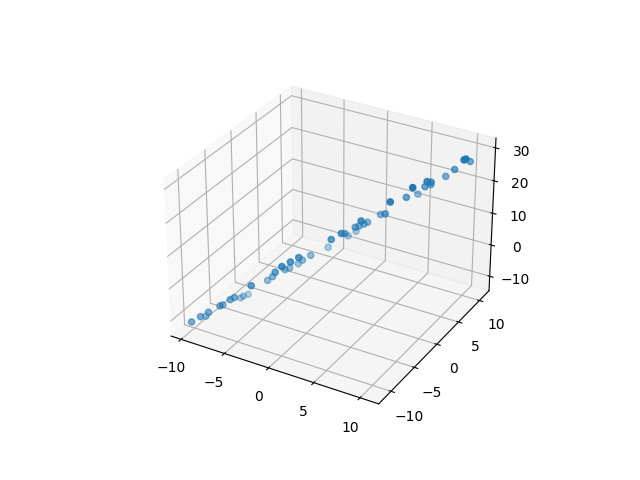

In [30]:
# visualize the points and model

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

In [31]:
# we reshape the arrays and train the same way as before

m = LinearRegression()
x = np.array([x1, x2]).T
y = y.reshape(-1, 1)

m.fit(x, y)

LinearRegression()

In [32]:
# This model has two coefficients and one bias

vx = np.array([-10, 10])
vy = vx * m.coef_[0][0] + vx * m.coef_[0][1] + m.intercept_[0]

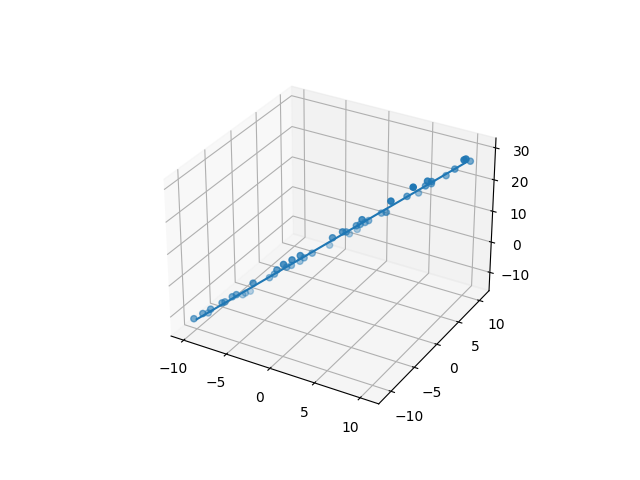

In [33]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)
ax.plot(vx, vx, vy)

# Nonlinear data

Linear regression on its own is not sufficient to properly model nonlinear data. Let us see why.

In [34]:
# here are our secret parameters

a1 = 3
a2 = -1
b = 7

# generate 50 samples along the line and perturb them just a little bit

x1 = np.linspace(-10, 10, 50) + np.random.randn(50)
x2 = np.linspace(-10, 10, 50) + np.random.randn(50)

# here we multiply the terms by each other instead of adding
y = a1 * x1 * a2 * x2 + b

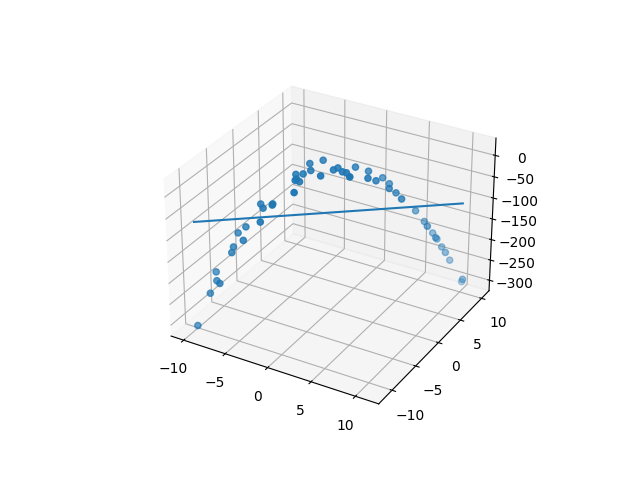

In [35]:
# we reshape the arrays and train the same way as before

m = LinearRegression()
x = np.array([x1, x2]).T
y = y.reshape(-1, 1)

m.fit(x, y)

# and then visualize
# as you can see, the line is not a very good representation of this function
# we will have to turn to other methods for this sort of data

vx = np.array([-10, 10])
vy = vx * m.coef_[0][0] + vx * m.coef_[0][1] + m.intercept_[0]

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)
ax.plot(vx, vx, vy)